c:\Python Projects\tohoku_university\geese_project\data_engineering\metric_calculation.py:20: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",


Starting with analysis 1 / 199
Cleaning data...
Data Cleaned!
Computing metrics between birds...


c:\Python Projects\tohoku_university\geese_project\data_engineering\clean_trajectory.py:6: SyntaxWarning: invalid escape sequence '\s'
  """ """Read data from file into a pandas dataframe and return this dataframe""" """


Saving metrics...
Done!
Extracting submetrics...
Saving plots...


c:\Python Projects\tohoku_university\geese_project\visualization\animate_trajectory.py:28: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",


ValueError: Per-column arrays must each be 1-dimensional

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

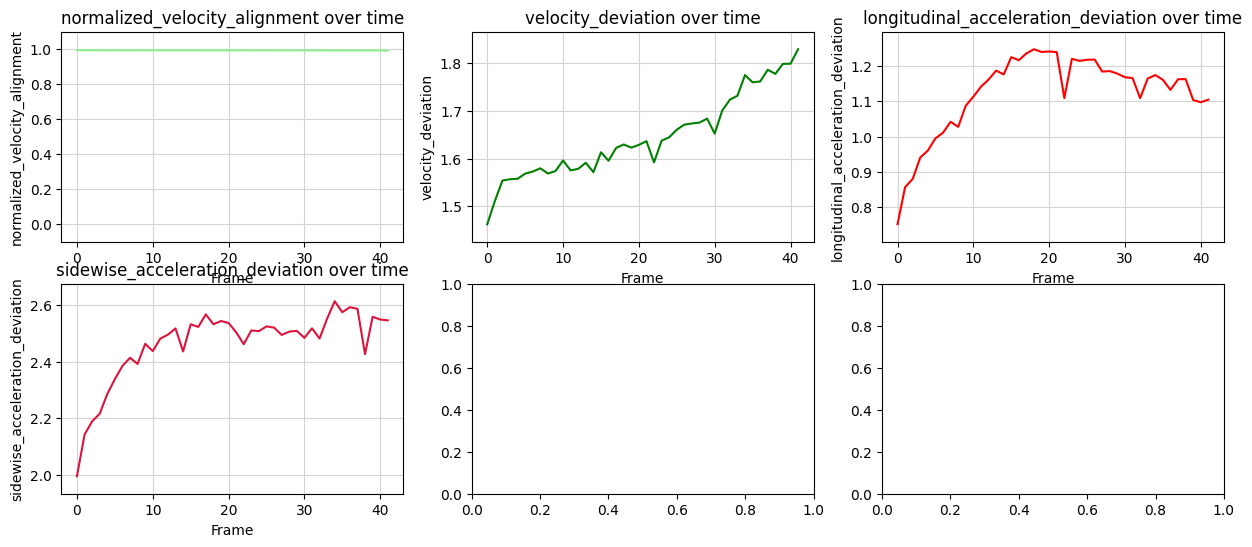

In [1]:
import numpy as np
import pandas as pd
from tqdm import trange
import os

# project's own imports
from data_engineering.run_analysis import trajectory_analysis
from data_engineering.metric_calculation import (
    # boltzmann_metric,
    # inverse_exponential_distance_metric,
    calculate_velocity_deviation,
    calculate_velocity_alignment,
    calculate_longitudinal_acceleration_deviation,
    calculate_sidewise_acceleration_deviation,
    calculate_velocity_PCA
)


# ===================================================================================================
folder_path = "data/trajectory_data"
# ===================================================================================================

amount_of_analysises = len(os.listdir(folder_path)) - 1

velocity_deviations = []
velocity_alignments = []
longitudinal_acceleration_deviations = []
sidewise_acceleration_deviations = []
velocity_pca_first_components = []
velocity_pca_second_components = []


i = 0
for filename in os.listdir(folder_path):
    i += 1

    if filename != 'Notes.txt' and filename != 'trajectory_data' and '.txt' not in filename:

        order_metrics = []

        normalized_velocity_alignment_metric = {
            "name": "normalized_velocity_alignment",
            "function": calculate_velocity_alignment,
            "values": [],
            "color": "lightgreen",
            "value_space": [0, 1],
            "submetrics": False,
        }
        order_metrics.append(normalized_velocity_alignment_metric)
        velocity_deviation_metric = {
            "name": "velocity_deviation",
            "function": calculate_velocity_deviation,
            "values": [],
            "color": "green",
            "value_space": [],
            "submetrics": False,
        }
        order_metrics.append(velocity_deviation_metric)
        longitudinal_acceleration_metric = {
            "name": "longitudinal_acceleration_deviation",
            "function": calculate_longitudinal_acceleration_deviation,
            "values": [],
            "color": "red",
            "value_space": [],
            "submetrics": False,
        }
        order_metrics.append(longitudinal_acceleration_metric)
        sidewise_acceleration_metric = {
            "name": "sidewise_acceleration_deviation",
            "function": calculate_sidewise_acceleration_deviation,
            "values": [],
            "color": "crimson",
            "value_space": [],
            "submetrics": False,
        }
        order_metrics.append(sidewise_acceleration_metric)
        PCA_velocity_metric = {
            "name": "PCA_velocity_metric",
            "function": calculate_velocity_PCA,
            "values": [],
            "color": "blue",
            "value_space": [],
            "submetrics": False,
            'n_submetrics': 2,
        }
        order_metrics.append(PCA_velocity_metric)



        if i <= amount_of_analysises:
            print(f"Starting with analysis {i} / {amount_of_analysises}")

        if filename.endswith(".trj"):
            filename = os.path.splitext(filename)[0]

            # launch analysis
            order_metrics = trajectory_analysis(filename, order_metrics, no_plotting=True)
            

        
            if order_metrics is not None:
                velocity_alignments.append(order_metrics[0]['values'])
                velocity_deviations.append(order_metrics[1]['values'])
                longitudinal_acceleration_deviations.append(order_metrics[2]['values'])
                sidewise_acceleration_deviations.append(order_metrics[3]['values'])
                velocity_pca_first_components.append(order_metrics[4]['values'][0])
                velocity_pca_second_components.append(order_metrics[4]['values'][1])


In [2]:
velocity_deviations = np.concatenate([np.array(d) for d in velocity_deviations])
velocity_alignments = np.concatenate([np.array(d) for d in velocity_alignments])
longitudinal_acceleration_deviations = np.concatenate([np.array(d) for d in longitudinal_acceleration_deviations])
sidewise_acceleration_deviations = np.concatenate([np.array(d) for d in sidewise_acceleration_deviations])
velocity_pca_first_components = np.concatenate([np.array(d) for d in velocity_pca_first_components])
velocity_pca_second_components = np.concatenate([np.array(d) for d in velocity_pca_second_components])



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

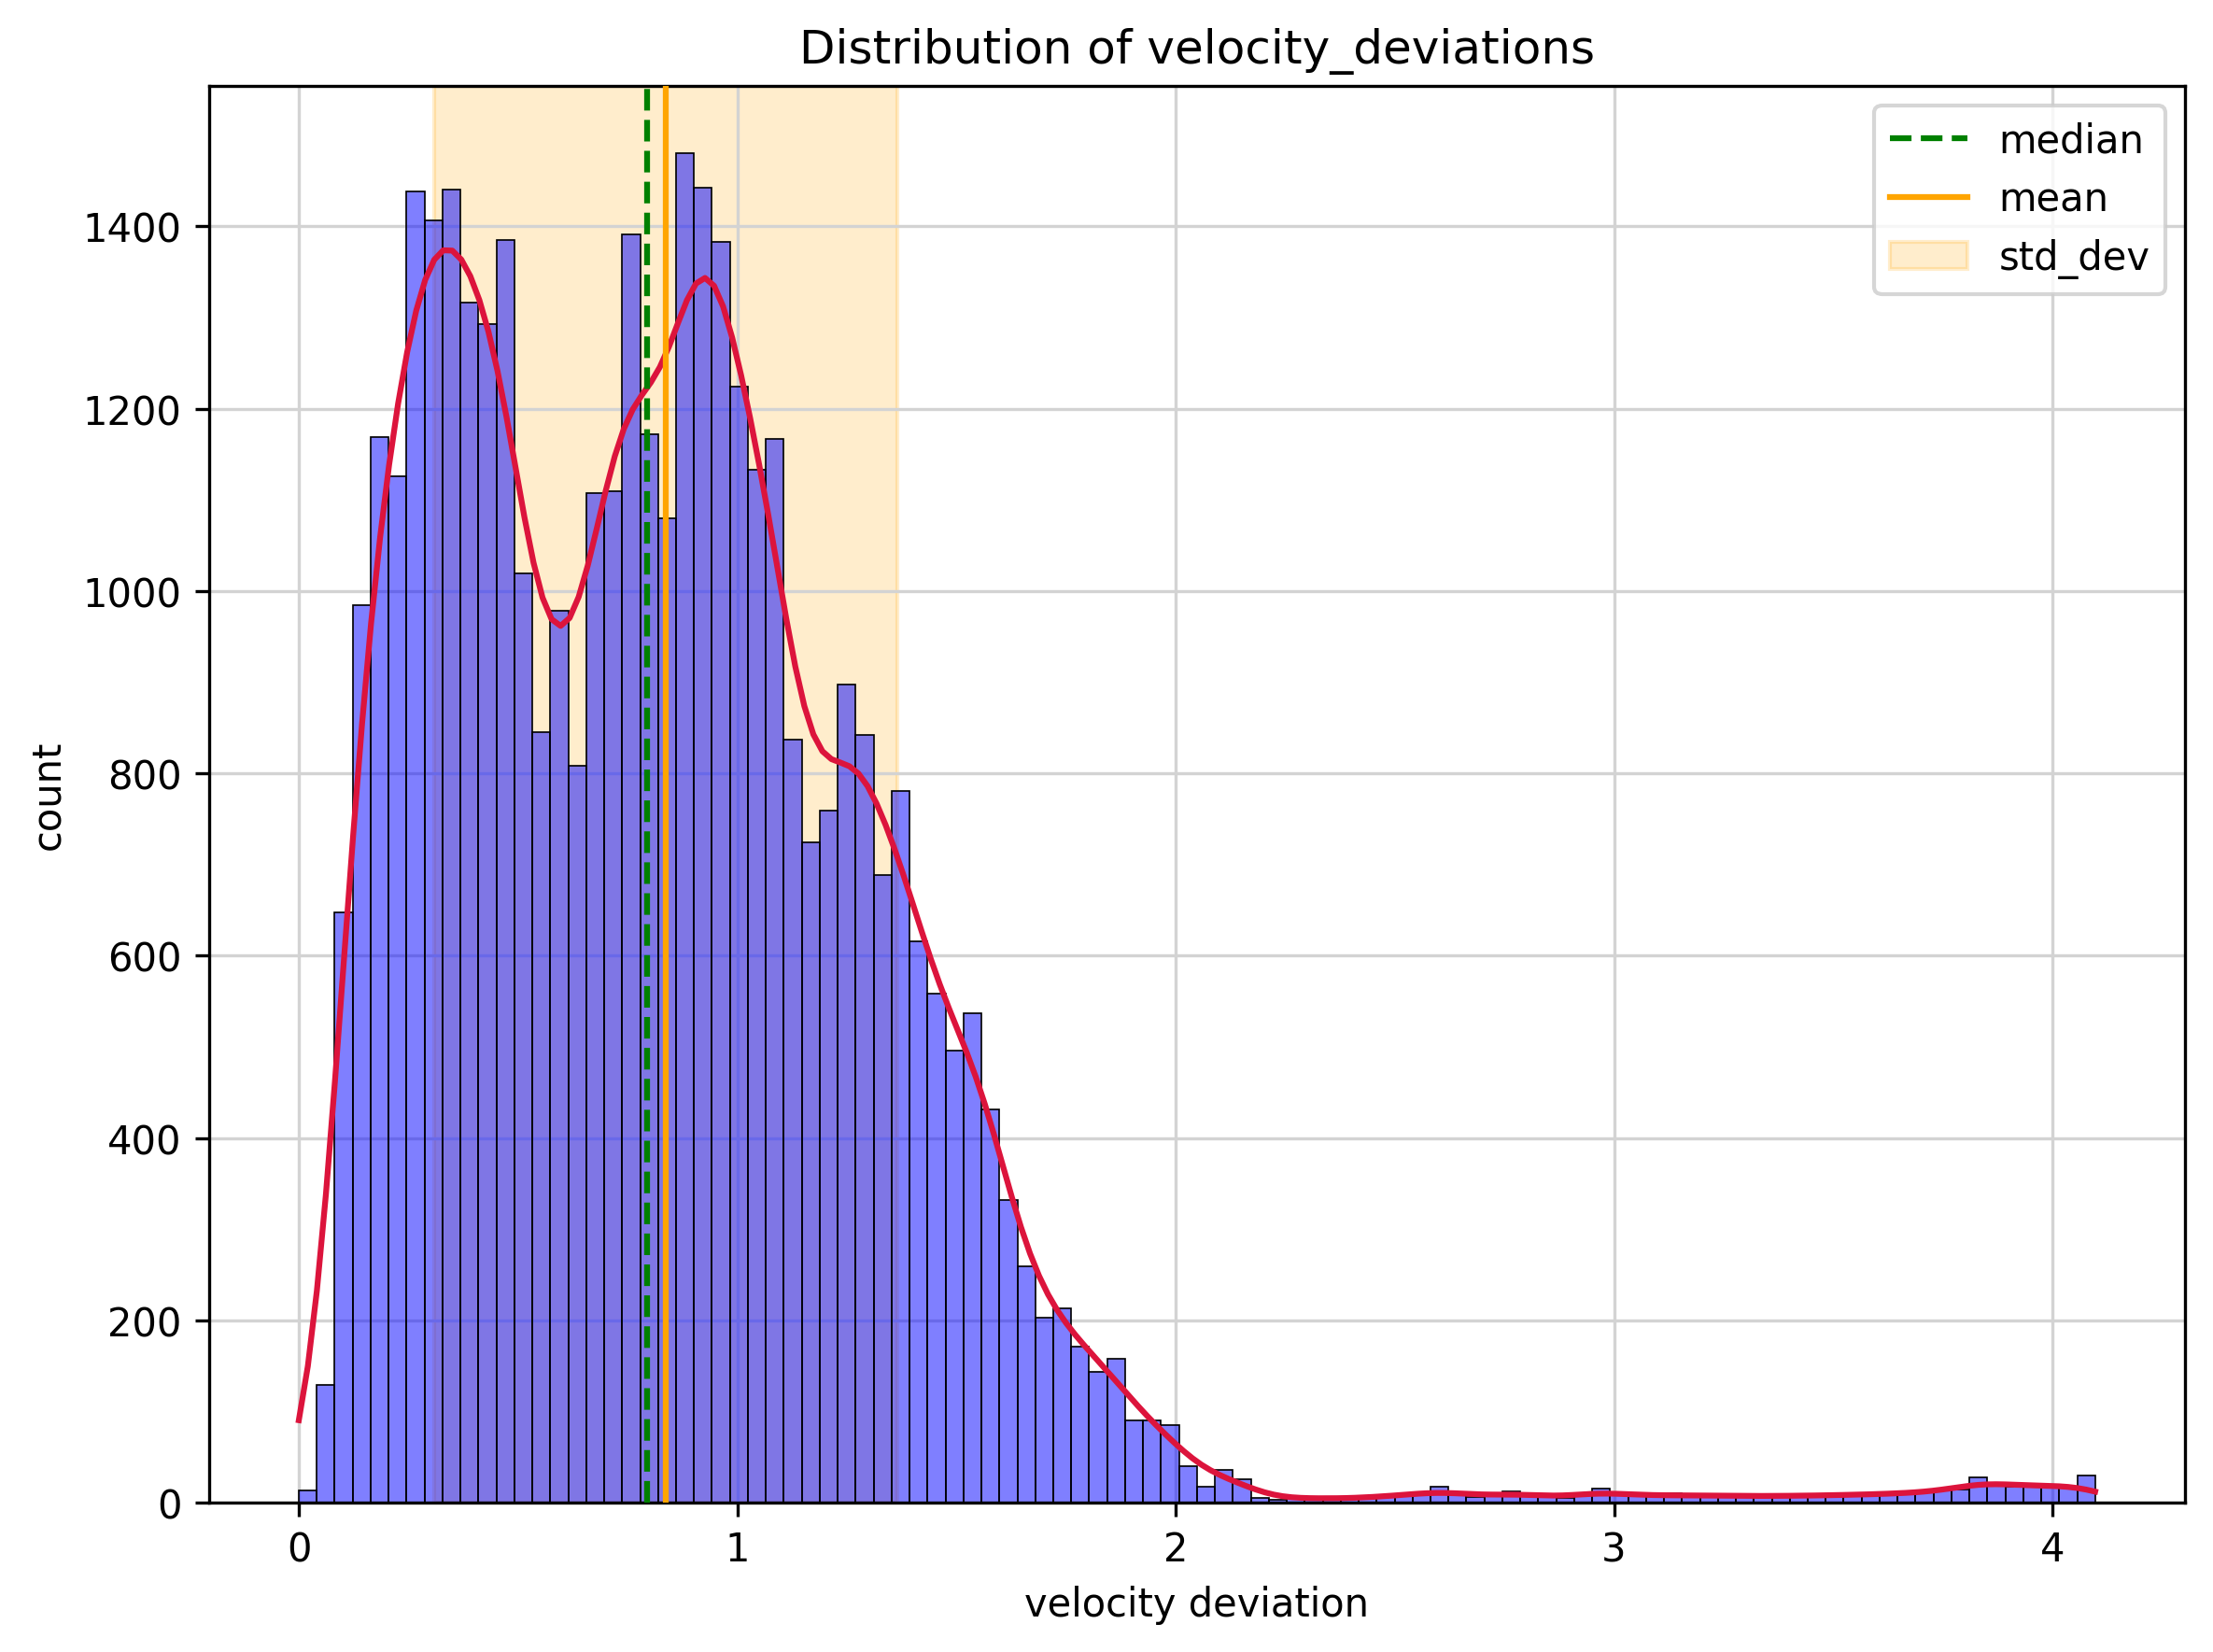

In [20]:
values = velocity_deviations

values = values[np.isfinite(values)]
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of velocity_deviations')
plt.xlabel('velocity deviation')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()


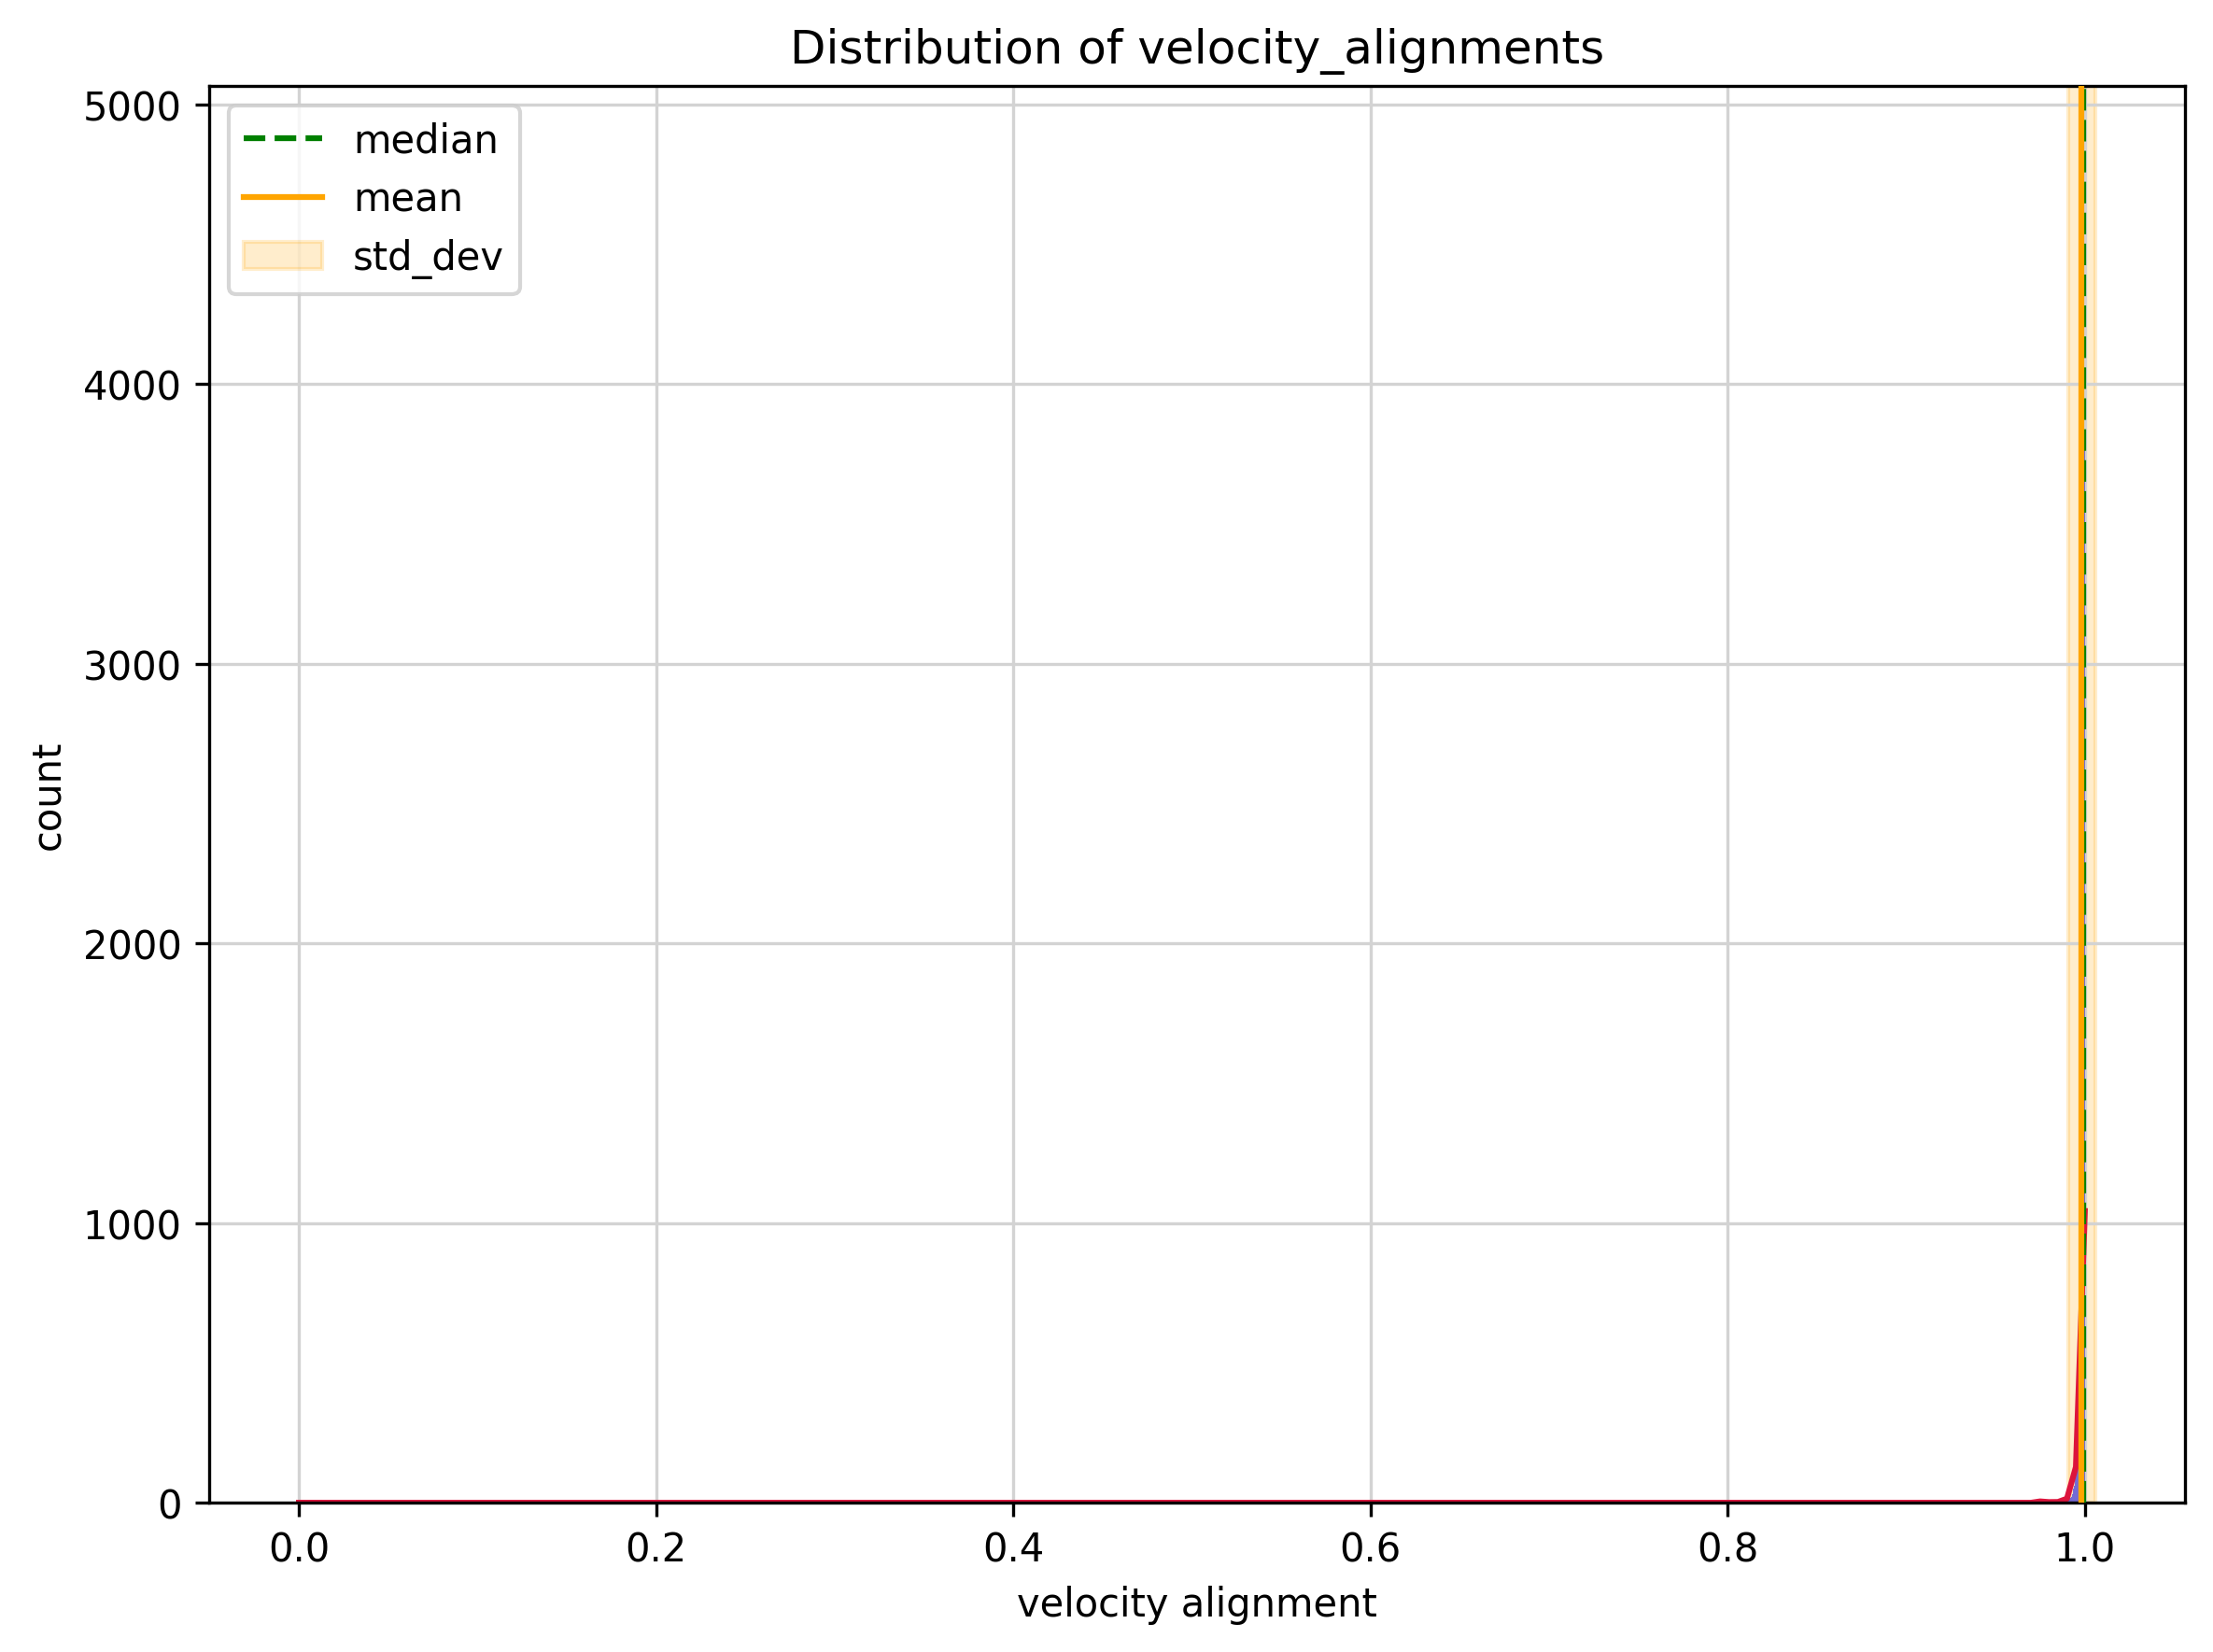

In [21]:
values = velocity_alignments

values = values[np.isfinite(values)]
mean = np.mean(values)
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of velocity_alignments')
plt.xlabel('velocity alignment')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()


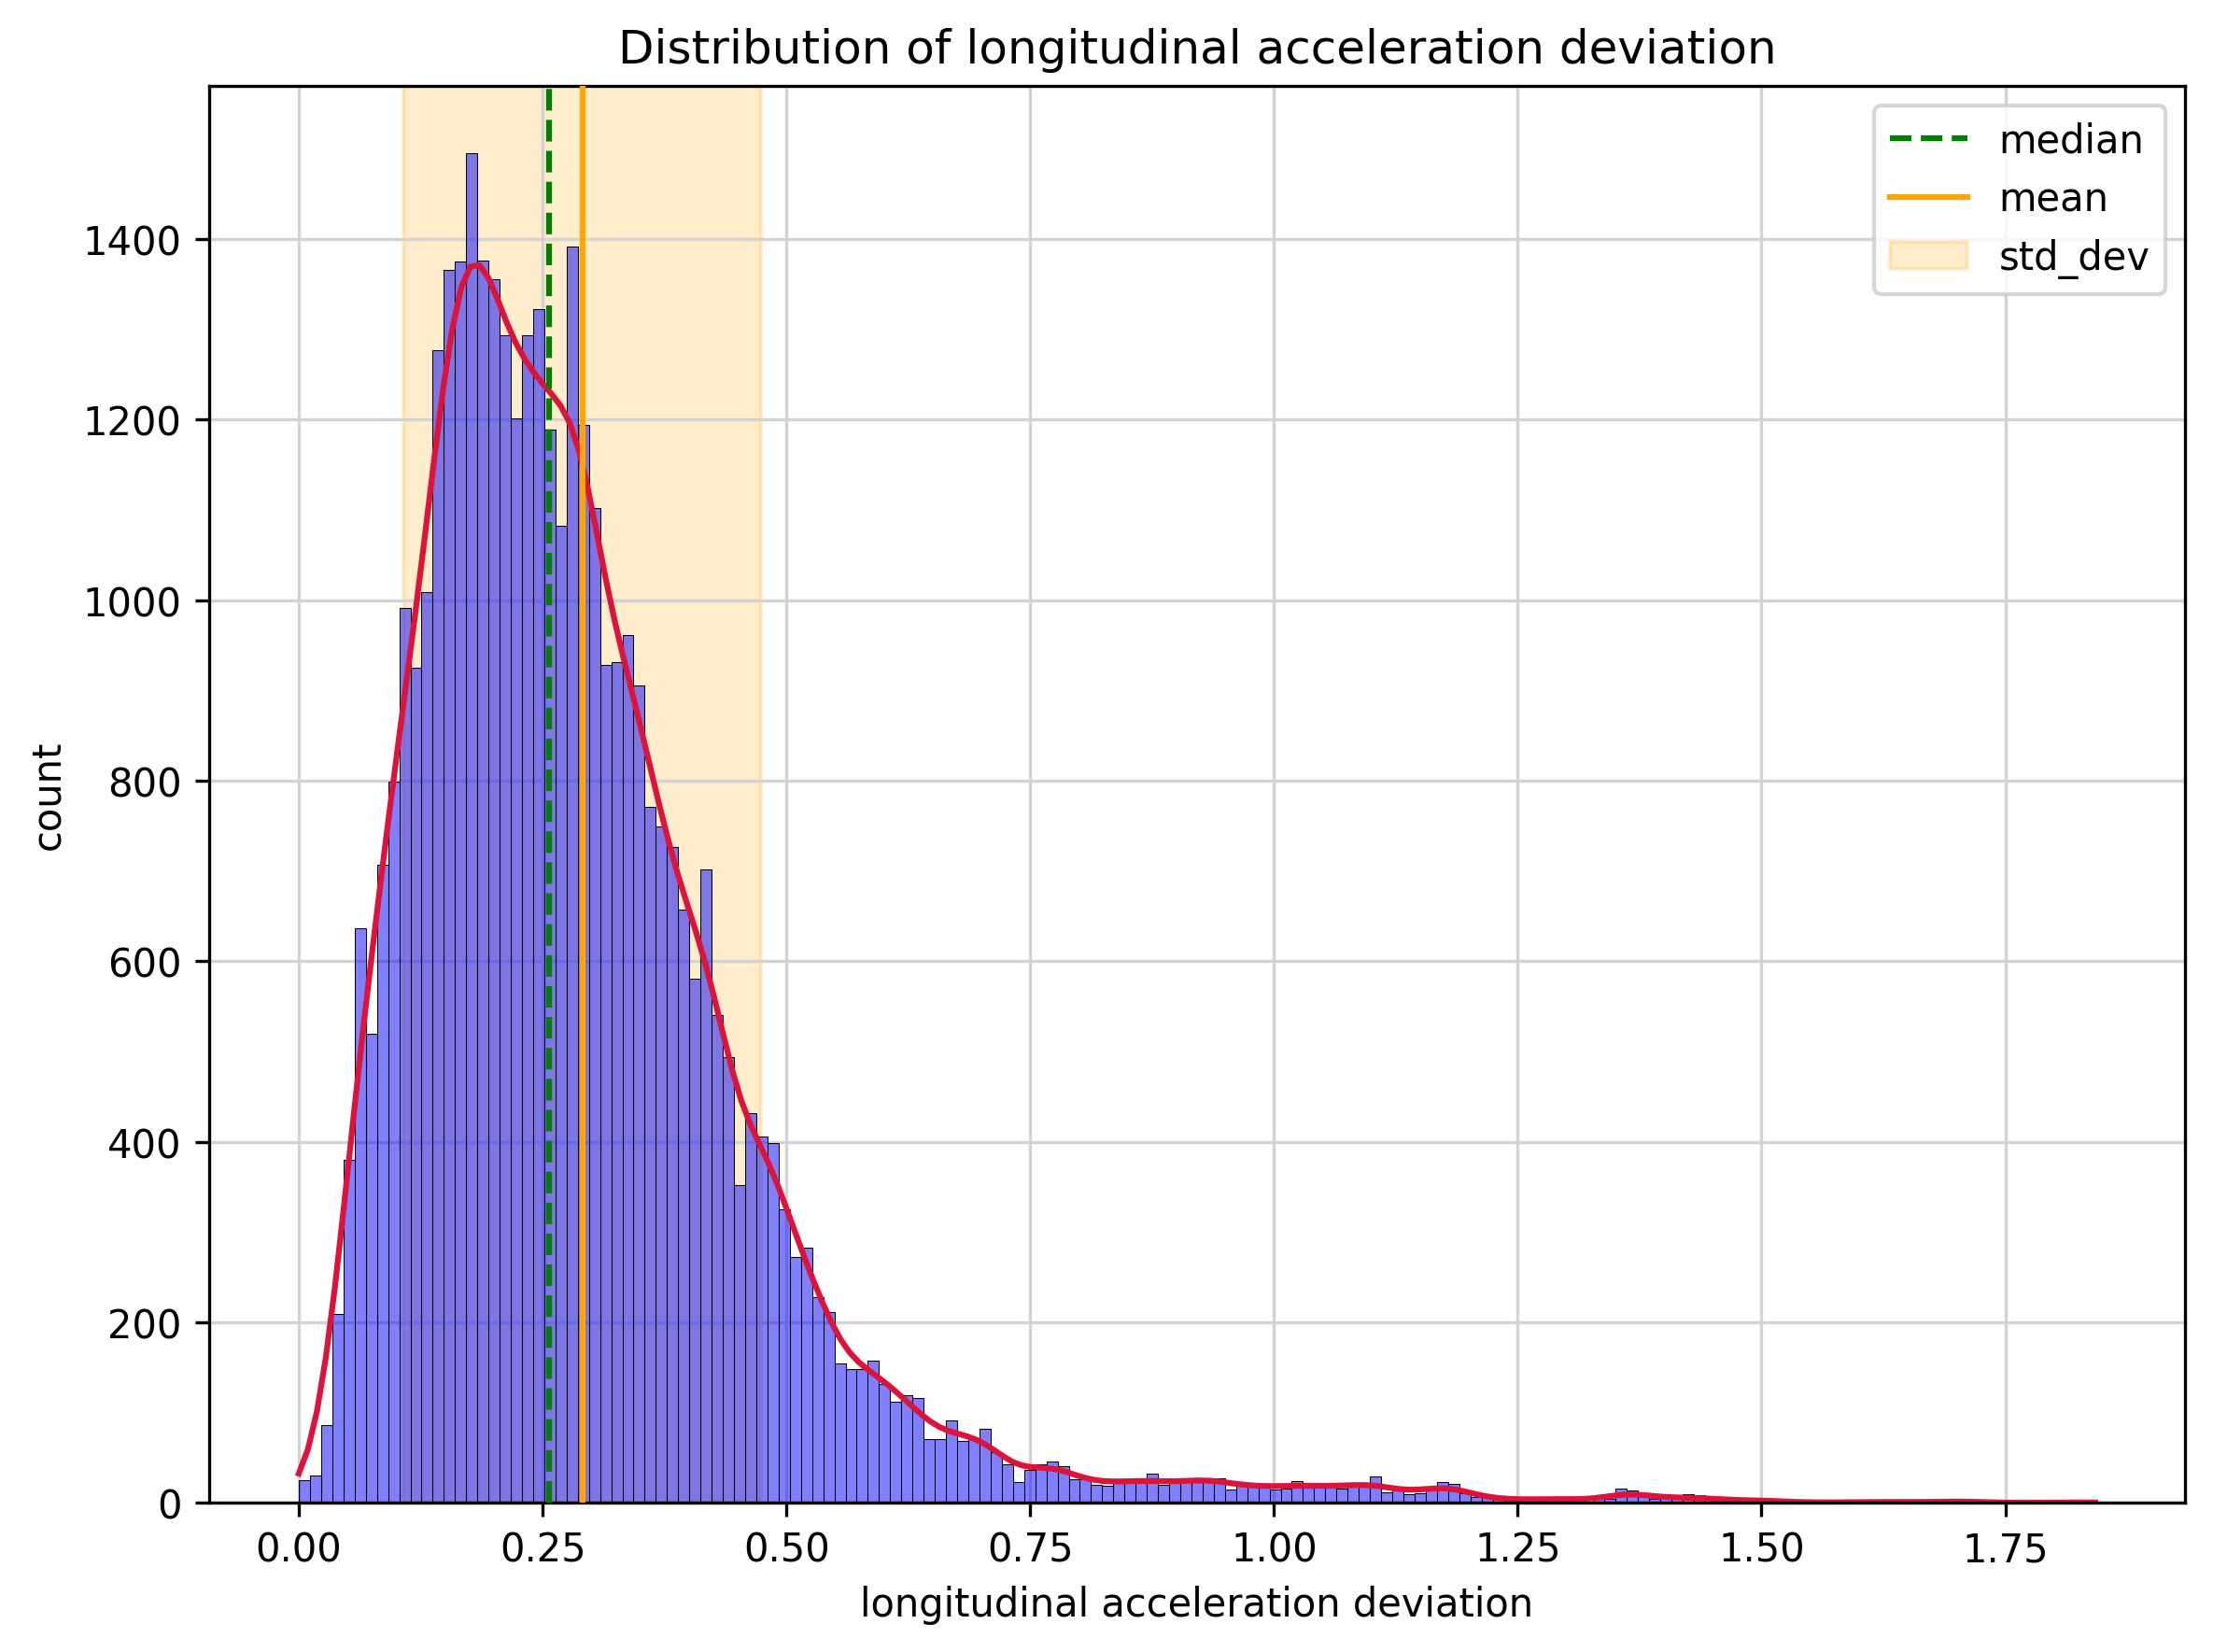

In [22]:
values = longitudinal_acceleration_deviations

values = values[np.isfinite(values)]
mean = np.mean(values)
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of longitudinal acceleration deviation')
plt.xlabel('longitudinal acceleration deviation')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()


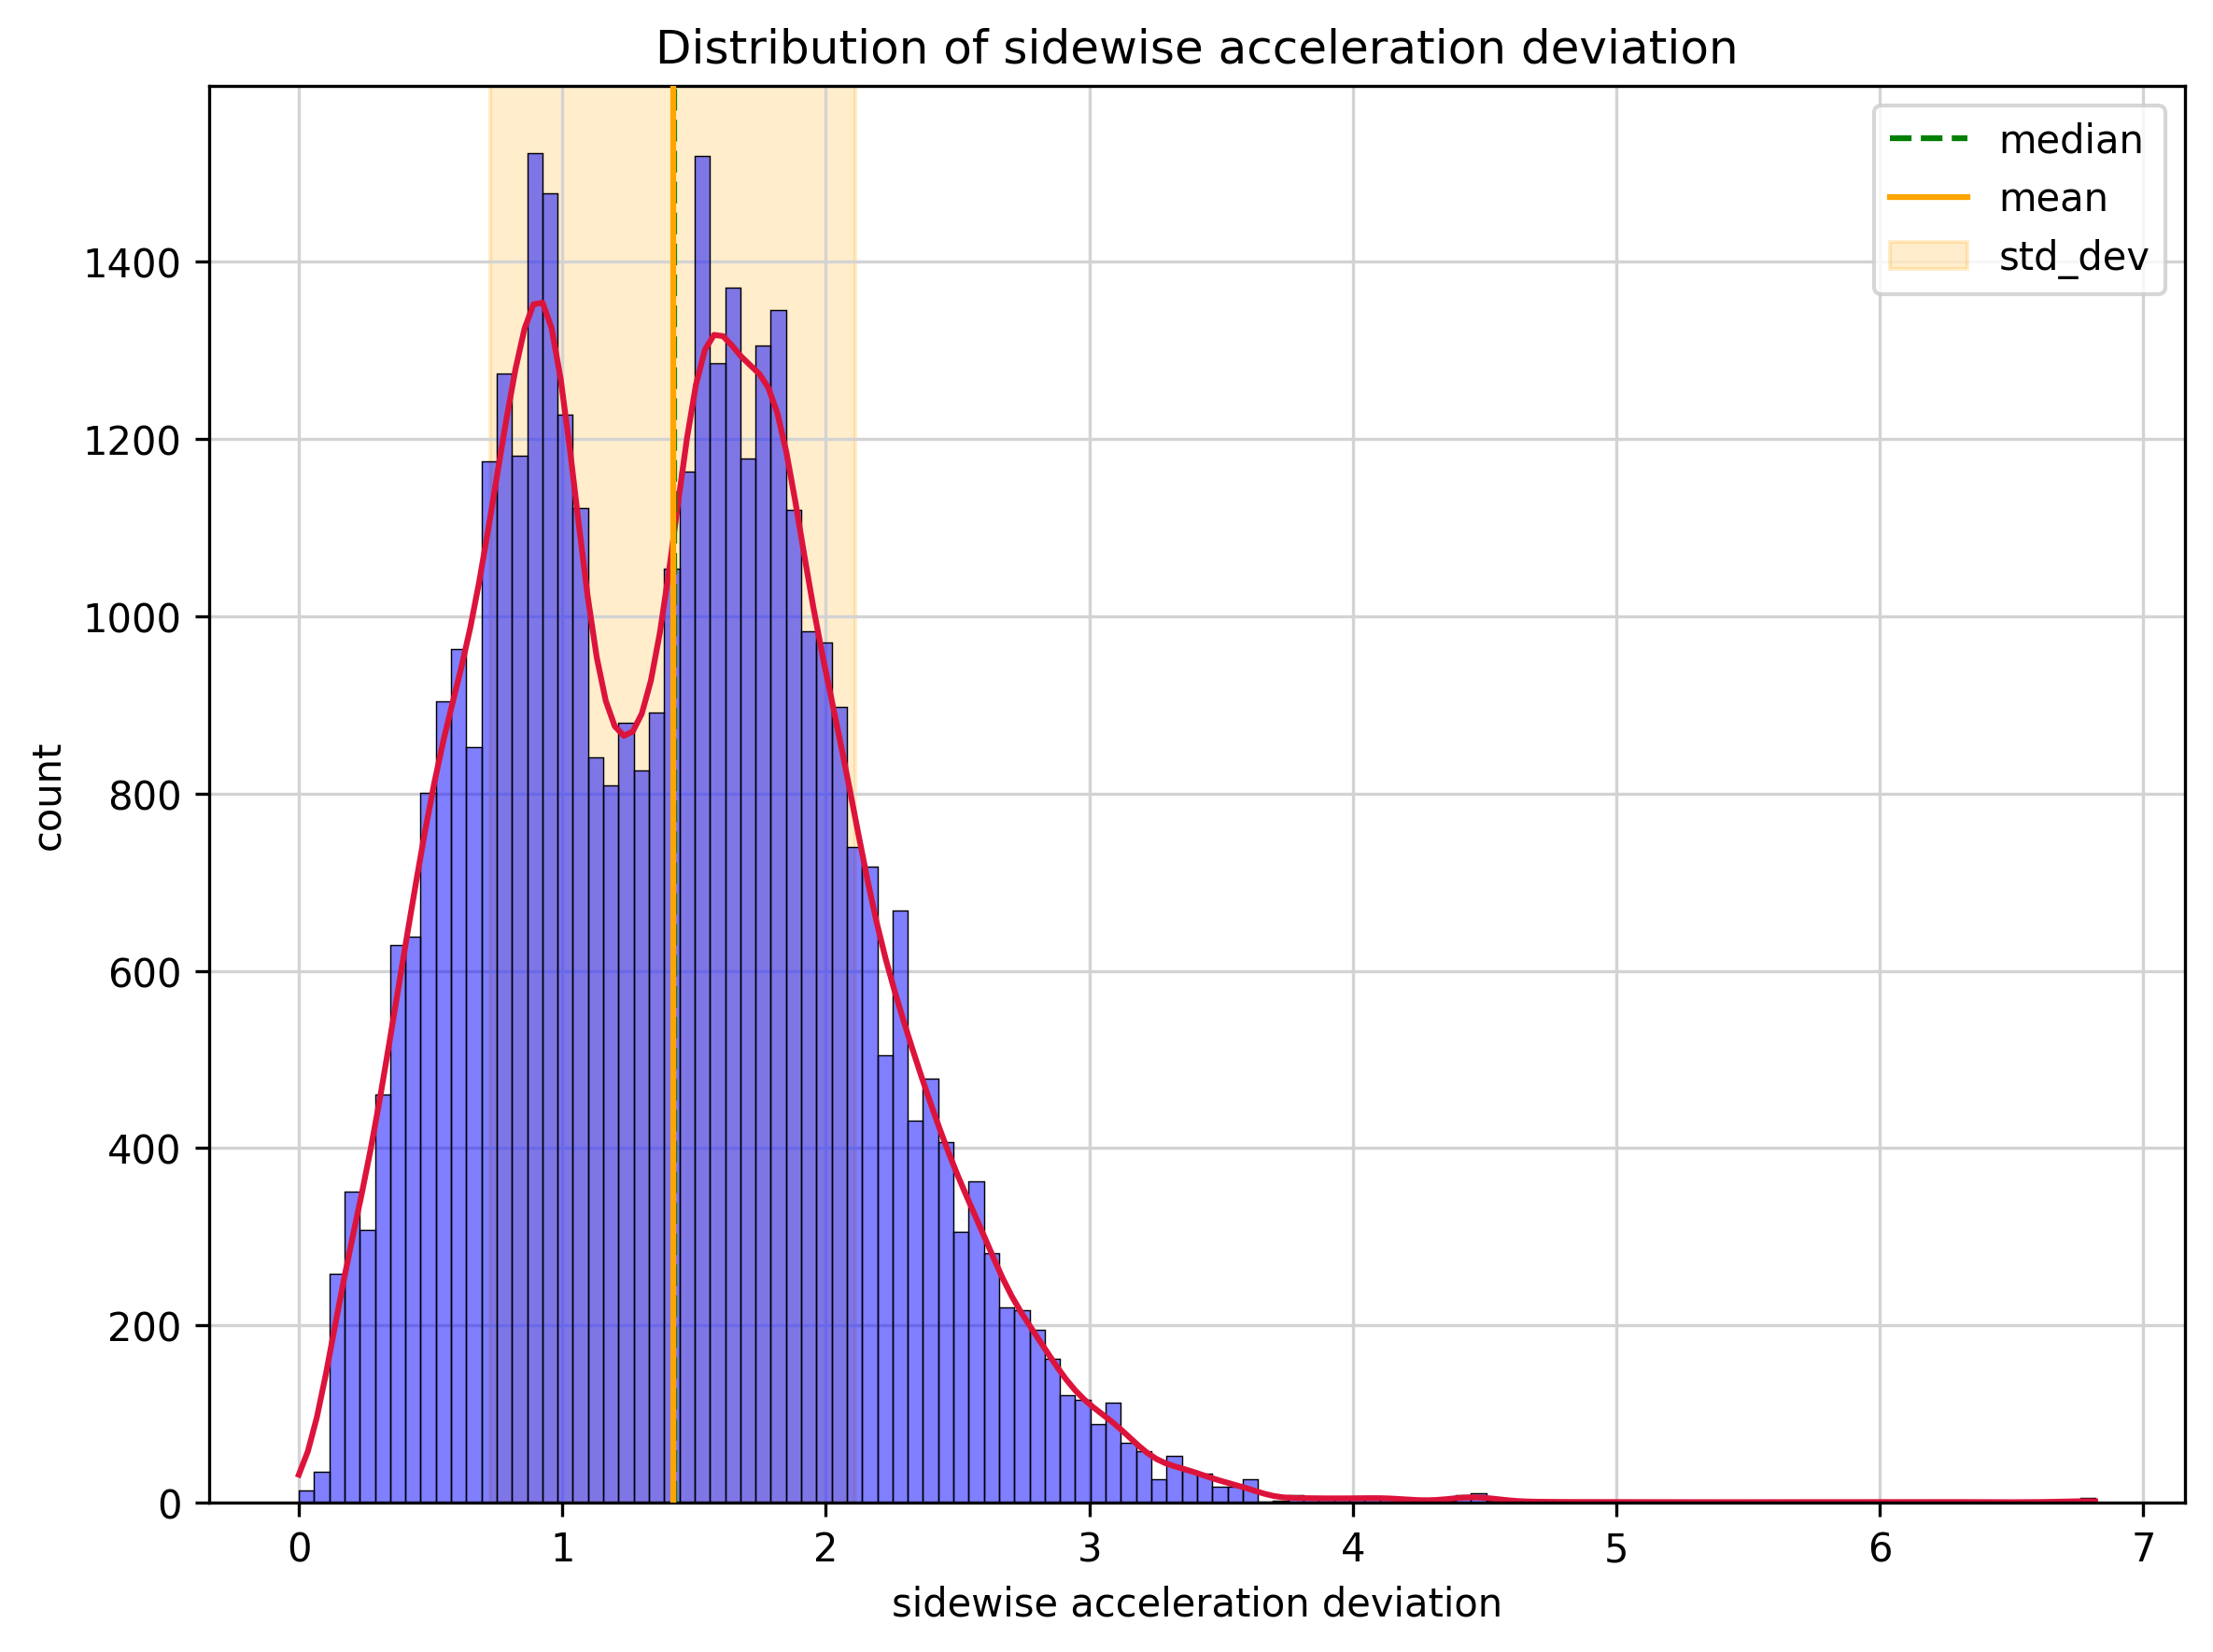

In [23]:
values = sidewise_acceleration_deviations

values = values[np.isfinite(values)]
mean = np.mean(values)
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of sidewise acceleration deviation')
plt.xlabel('sidewise acceleration deviation')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()


In [ ]:
values = velocity_pca_first_components

values = values[np.isfinite(values)]
mean = np.mean(values)
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of first velocity PCA component')
plt.xlabel('first velocity PCA component')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()


In [ ]:
values = velocity_pca_second_components

values = values[np.isfinite(values)]
mean = np.mean(values)
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of first velocity PCA component')
plt.xlabel('first velocity PCA component')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()

